
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [1]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for visualization
from matplotlib import pyplot as plt # used for visualization, creating plots
import pylab
import pingouin as pg # used for calculating the correlation coefficient

df_mh = pd.read_csv('MillerHadenData.csv')

In [2]:
# Q1a (code):
# Display first few rows of the dataframe
print(df_mh.head())

# Check data types and information
print(df_mh.info()) # We can see that there are 5 columns, 25 entries, and that the only datatype we have is integer.
print(df_mh.describe()) # Here we can see some statistical information (e.g. mean, standard deviation).

   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB
None
       Participant       Abil          IQ        Home          TV
count    25.000000  25.000000   25.000000   25.000000   25.000000
mean     13.000000  55.120000  100.040000  124.000000  599.920000
std       7.359801   6.084954    9.043782   21.039645   95.056965
min       1.000000  45.000000   81.000000   87.000000  407.000000
25%       7.000000  50.

In [3]:
# Q1b (code):
# Check for missing values
print(df_mh.notnull()) # notnull() returns the value 'True' everywhere, meaning that we do not have any missing values.

# Check whether there is a data point for each participant on both variables
ability_and_iq = pd.notnull(df_mh[["Participant", "Abil", "IQ"]])
ability_and_iq # notnull() returns the value 'True' everywhere, meaning that there is a data point for each participant on both variables (Abil and IQ).

    Participant  Abil    IQ  Home    TV
0          True  True  True  True  True
1          True  True  True  True  True
2          True  True  True  True  True
3          True  True  True  True  True
4          True  True  True  True  True
5          True  True  True  True  True
6          True  True  True  True  True
7          True  True  True  True  True
8          True  True  True  True  True
9          True  True  True  True  True
10         True  True  True  True  True
11         True  True  True  True  True
12         True  True  True  True  True
13         True  True  True  True  True
14         True  True  True  True  True
15         True  True  True  True  True
16         True  True  True  True  True
17         True  True  True  True  True
18         True  True  True  True  True
19         True  True  True  True  True
20         True  True  True  True  True
21         True  True  True  True  True
22         True  True  True  True  True
23         True  True  True  True  True


,Participant,Abil,IQ
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
5,True,True,True
6,True,True,True
7,True,True,True
8,True,True,True
9,True,True,True


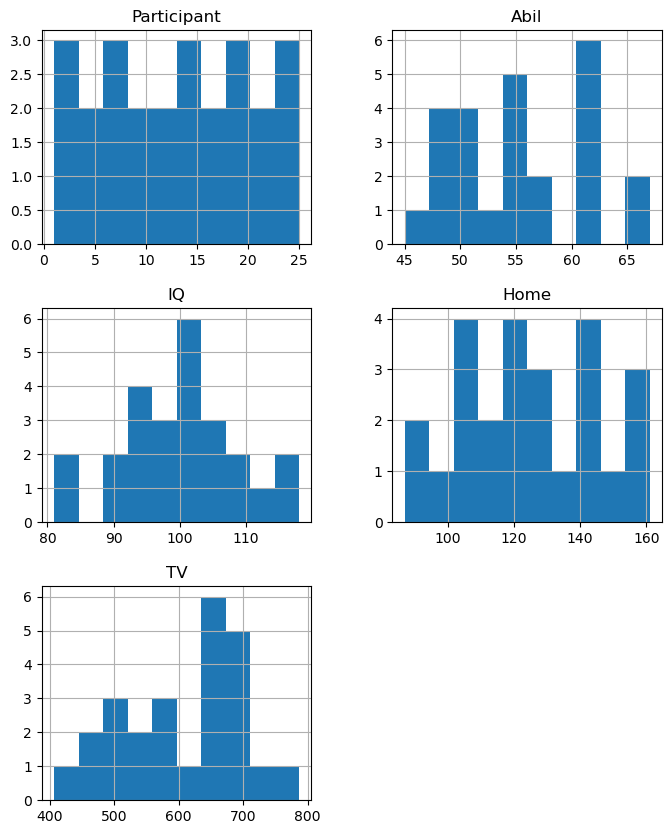

In [4]:
# Q1c (code):
# Check data distribution
df_mh.hist(figsize=(8,10));

# We can see a bell-shaped curve in the case of Abil, IQ, Home and TV, therefore, in those cases there is a normal distribution of the data.

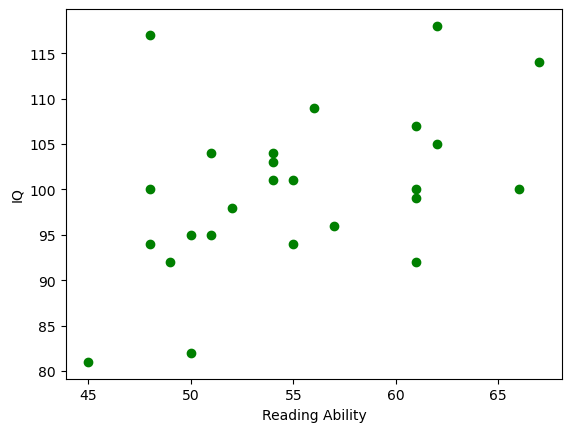

In [5]:
# Q1d (code):
# Scatter plot
reading_ability = df_mh['Abil']
iq = df_mh['IQ']
plt.scatter(reading_ability, iq, c="g")
plt.xlabel("Reading Ability") 
plt.ylabel("IQ")
plt.show()

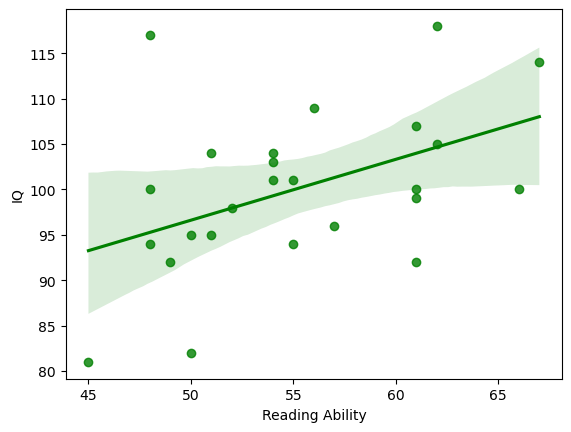

In [6]:
# Q1e (code):
# Correlation line
plot_corr_sns = sns.regplot(x="Abil", y="IQ", color="g", data=df_mh)
plot_corr_sns.set(xlabel='Reading Ability', ylabel='IQ');

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

In [7]:
# Q2a (answer with words):
# As the histograms demonstrate, the data of the variables Reading Ability and IQ are normally distributed. Hence, we need a parametric test, which is Pearson's coefficient test.

In [8]:
# Q2b (code):
corr_reading_ability_iq = pg.corr(reading_ability, iq, method='pearson')
print(corr_reading_ability_iq)

          n        r         CI95%     p-val   BF10     power
pearson  25  0.45117  [0.07, 0.72]  0.023593  2.804  0.640299


In [9]:
# Q2c (answer with words):
# There is a positive correlation between the two variables as the scatter plot (upward slope) and the correlation coefficient (r=0.45) show.
# Regarding the strength, the value of the correlation coefficient r is 0.45 showing a moderate / medium degree of correlation.
# When the absolute value of the coefficient is above 0.5 the correlation is considered to be a high degree of correlation and below 0.3 it is a low degree of correlation.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [10]:
# Q3a (answer in words):
# H0: There is no relationship between the amount of time spent with reading at home and the level of the reading ability.
# H1：People who spend more time reading at home will have a high level of reading ability.

In [11]:
# Q3b (code):
# Import necessary libraries
import pandas as pd #used for data wrangling, working with dataframes
from scipy.stats import chi2_contingency #used for the Chi-square test of independence of variables in a contingency table 

# Define the rounded average for Reading Ability and Home
abil_ave = df_mh['Abil'].mean()
home_ave = df_mh['Home'].mean()

# Create the Rank_Abil column
def category_abil(number):
    if number <= abil_ave:
        return 'low'
    else:
        return 'high'

df_mh['Rank_Abil'] = df_mh['Abil'].apply(category_abil)

# Create the Rank_Home column
def category_home(number):
    if number <= home_ave:
        return 'low'
    else:
        return 'high'

df_mh['Rank_Home'] = df_mh['Home'].apply(category_home)

In [12]:
# Q3c (code):
# Construct Contingency Matrix
data4contingency = []
data4contingency.append(sum(df_mh['Rank_Abil'] == 'high'))
data4contingency.append(sum(df_mh['Rank_Abil'] == 'low'))
data4contingency.append(sum(df_mh['Rank_Home'] == 'high'))
data4contingency.append(sum(df_mh['Rank_Home'] == 'low'))

print('The values:')
print(data4contingency)

# We transform the list in a contingency matrix
import numpy as np

data = np.array(data4contingency).reshape(2,-1)

print('The contingency matrix')
print(data)

The values:
[10, 15, 11, 14]
The contingency matrix
[[10 15]
 [11 14]]


In [13]:
# Q3d (code):
# Perform the Chi-square test
chi2, p_value, degree_of_freedom, expected_frequencies = chi2_contingency(data)
print(chi2, p_value)
print('These are the expected frequencies')
print(expected_frequencies)

if p_value < 0.05:
    print("The observed differences are statiscally significant - H0 is rejected")
else:
    print("The observed differences are not statiscally significant - H1 is rejected")

0.0 1.0
These are the expected frequencies
[[10.5 14.5]
 [10.5 14.5]]
The observed differences are not statiscally significant - H1 is rejected


In [14]:
# Q3e (answer in words):
# The p-value is higher than 0.05, it is 1.0. Therefore, the differences are not statistically different, so H1 is rejected.
# This means that here is no relationship between the amount of time spent with reading at home and the level of the reading ability.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [15]:
import pandas as pd # used for data wrangling, working with dataframes
from scipy import stats # used for statistical tests, correlation functions, probability distributions
import numpy as np # used for scientific computing, creating a contingency table
import matplotlib.pyplot as plt # used for visualization, creating plots
import seaborn as sns # used for visualization

# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()

,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [16]:
# Q4a (code):
# Calculate mean and standard deviation for age
print(df_evaluators['age'].mean(skipna=True))
print(df_evaluators['age'].std(skipna=True))

df_evaluators.describe()

#The skipna parameter enables us to “skip” the missing values when the mean is calculated. Skipna = True causes the mean() method to exclude missing values or NaN values. If skipna is set to False, the method will attempt to include the missing values.

30.852941176470587
6.238358141327351


,eval_id,age,sex
count,39.000000,34.000000,34.000000
mean,20.000000,30.852941,1.882353
std,11.401754,6.238358,0.327035
min,1.000000,23.000000,1.000000
25%,10.500000,27.000000,2.000000
50%,20.000000,29.000000,2.000000
75%,29.500000,32.750000,2.000000
max,39.000000,48.000000,2.000000


In [17]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
df_evaluators['sex'].value_counts()
# There are 4 male and 30 female evaluators.

2.0    30
1.0     4
Name: sex, dtype: int64

###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [18]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [19]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
df_ratings_TCI = df_ratings.loc[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]
#Use isin() to include multiple values of a column (put them in a list).

In [20]:
# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
df_ratings_TCI.groupby(by='eval_id').mean().reset_index().head()

C:\Users\rekaj\AppData\Local\Temp\ipykernel_12836\2223270231.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ratings_TCI.groupby(by='eval_id').mean().reset_index().head()


,eval_id,Rating
0,1,6.000000
1,2,5.666667
2,3,6.000000
3,4,3.333333
4,5,1.000000


In [21]:
# Add a 'Category' column with the value 'intellect' for these rows
df_ratings_INT = df_ratings_TCI.groupby(by='eval_id').mean().reset_index()
df_ratings_INT['Category'] = 'intellect'

C:\Users\rekaj\AppData\Local\Temp\ipykernel_12836\380087239.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ratings_INT = df_ratings_TCI.groupby(by='eval_id').mean().reset_index()


In [22]:
# Create a DataFrame for 'impression' and 'hire' ratings
df_ratings_IH = df_ratings.loc[df_ratings['Category'].isin(['impression', 'hire'])]

In [23]:
# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([df_ratings_INT, df_ratings_IH])

In [24]:
# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = ratings2.merge(df_evaluators, on = 'eval_id')

In [25]:
ratings2 = ratings2.rename(columns={'Rating': 'rating', 'Category': 'category'})

In [26]:
# Select only the necessary columns as per the structure required
ratings2 = ratings2.drop(['age', 'sex'], axis = 1)

In [27]:
# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by = ['eval_id', 'category'])

In [28]:
# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,rating,category,condition
2,1,6.000000,hire,listened
1,1,7.000000,impression,listened
0,1,6.000000,intellect,listened
5,2,4.000000,hire,listened
4,2,4.666667,impression,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [29]:
# Q6a (answer in words):
# Null hypothesis:
# The overall ratings of the evaluators who listened to the pitches are not different from the overall ratings of the evaluators who read the pitches.
# (= The mean of the overall ratings of the evaluators who listened to the pitches is the same as the mean of the overall ratings of the evaluators who read the pitches.)

# Alternative hypothesis:
# The overall ratings of the evaluators who listened to the pitches are different from the overall ratings of the evaluators who read the pitches.
# (= The mean of the overall ratings of the evaluators who listened to the pitches is not the same as the mean of the overall ratings of the evaluators who read the pitches.)


# we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

In [30]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.
# We should use the two-tailed t-test because the alternative hypothesis is non-directional.

In [31]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?
# The variables are the condition, with the values read or listened, and the ratings of the evaluators.


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [32]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for statistical tests; Shapiro-Wilk test for normality, Levene test for equal variance, t-test

In [33]:
# Descriptive analysis of the ratings
ratings2['rating'].describe()

count    117.000000
mean       4.561254
std        2.240198
min        0.000000
25%        3.000000
50%        4.666667
75%        6.000000
max        9.000000
Name: rating, dtype: float64

In [34]:
# Test for normal distribution (Shapiro-Wilk test)

sub_df = ratings2.groupby("category")
intellect = sub_df.get_group("intellect") # create a dataframe for the category 'intellect'
hire = sub_df.get_group("hire") # create a dataframe for the category 'hire'
impression = sub_df.get_group("impression") # create a dataframe for the category 'impression'

In [35]:
shapiro_results = []
score_shapiro_intellect, p_val_shapiro_intellect = stats.shapiro(intellect['rating']) # apply the Shapiro-Wilk test to the ratings of the category 'intellect'
shapiro_results.append(p_val_shapiro_intellect)
print(score_shapiro_intellect, p_val_shapiro_intellect)

0.9747602939605713 0.5182666182518005


In [36]:
score_shapiro_hire, p_val_shapiro_hire = stats.shapiro(hire['rating']) # apply the Shapiro-Wilk test to the ratings of the category 'hire'
shapiro_results.append(p_val_shapiro_hire)
print(score_shapiro_hire, p_val_shapiro_hire)

0.9427909851074219 0.04710369557142258


In [37]:
score_shapiro_impression, p_val_shapiro_impression = stats.shapiro(impression['rating']) # apply the Shapiro-Wilk test to the ratings of the category 'impression'
shapiro_results.append(p_val_shapiro_impression)
print(score_shapiro_impression, p_val_shapiro_impression)

0.9595587849617004 0.17238670587539673


In [38]:
print(f"The p-value results of the Shapiro_Wilk test: {shapiro_results}")

The p-value results of the Shapiro_Wilk test: [0.5182666182518005, 0.04710369557142258, 0.17238670587539673]


In [39]:
# Test for homogeneity of variances (Levene's test)
# if the test is NOT statistically significance, then homogeneity of variance is "verified".
# if the test is statistically significance, then homogeneity of variance is NOT "verified".

levene_results = []
score, p_val = stats.levene(intellect['rating'], impression['rating']) # apply the Levene test to the ratings of the category 'intellect' and 'impression'
levene_results.append(p_val)
if p_val < 0.05:
    print("Levene's test is significant - use Welch's test")
else:
    print("Levene's test is not significant - proceed")

Levene's test is not significant - proceed


In [40]:
score, p_val = stats.levene(intellect['rating'], hire['rating']) # apply the Levene test to the ratings of the category 'intellect' and 'hire'
levene_results.append(p_val)
if p_val < 0.05:
    print("Levene's test is significant - use Welch's test")
else:
    print("Levene's test is not significant - proceed")


Levene's test is not significant - proceed


In [41]:
score, p_val = stats.levene(hire['rating'], impression['rating']) # apply the Levene test to the ratings of the category 'hire' and 'impression'
levene_results.append(p_val)
if p_val < 0.05:
    print("Levene's test is significant - use Welch's test")
else:
    print("Levene's test is not significant - proceed")


Levene's test is not significant - proceed


In [42]:
print(f"The p-value results of Levene's test: {levene_results}")

The p-value results of Levene's test: [0.3549856407301828, 0.2342383313415863, 0.7919757430149408]


In [43]:
# Independent t-tests
# Compare intellect, impression, and hire ratings between conditions (listened vs. read).

In [44]:
listened_intellect_loc = ratings2.loc[(ratings2["condition"] == "listened") & (ratings2["category"] == "intellect")] # create a dataframe for the 'category' 'intellect' with the 'condition' 'listened'
listened_impression_loc = ratings2.loc[(ratings2["condition"] == "listened") & (ratings2["category"] == "impression")] # create a dataframe for the 'category' 'impression' with the 'condition' 'listened'
listened_hire_loc = ratings2.loc[(ratings2["condition"] == "listened") & (ratings2["category"] == "hire")] # create a dataframe for the 'category' 'hire' with the 'condition' 'listened'

read_intellect_loc = ratings2.loc[(ratings2["condition"] == "read") & (ratings2["category"] == "intellect")] # create a dataframe for the 'category' 'intellect' with the 'condition' 'read'
read_impression_loc = ratings2.loc[(ratings2["condition"] == "read") & (ratings2["category"] == "impression")] # create a dataframe for the 'category' 'impression' with the 'condition' 'read'
read_hire_loc = ratings2.loc[(ratings2["condition"] == "read") & (ratings2["category"] == "hire")] # create a dataframe for the 'category' 'hire' with the 'condition' 'read'

In [45]:
ttest_results = []
ttest_score, p_val = stats.ttest_ind(listened_intellect_loc['rating'], read_intellect_loc['rating']) # apply the t-test to compare the ratings of 'listened intellect' and 'read intellect'
ttest_results.append(p_val)
if p_val < 0.05:
    print("Difference is statistically significant - reject H0, confirm H1")
else:
    print("Difference is NOT statistically significant - reject H1, confirm H0")

Difference is statistically significant - reject H0, confirm H1


In [46]:
ttest_score, p_val = stats.ttest_ind(listened_impression_loc['rating'], read_impression_loc['rating']) # apply the t-test to compare the ratings of 'listened impression' and 'read impression'
ttest_results.append(p_val)
if p_val < 0.05:
    print("Difference is statistically significant - reject H0, confirm H1")
else:
    print("Difference is NOT statistically significant - reject H1, confirm H0")

Difference is statistically significant - reject H0, confirm H1


In [47]:
ttest_score, p_val = stats.ttest_ind(listened_hire_loc['rating'], read_hire_loc['rating']) # apply the t-test to compare the ratings of 'listened hire' and 'read hire'
ttest_results.append(p_val)
if p_val < 0.05:
    print("Difference is statistically significant - reject H0, confirm H1")
else:
    print("Difference is NOT statistically significant - reject H1, confirm H0")

Difference is statistically significant - reject H0, confirm H1


In [48]:
print(f"The p-value results of t-test: {ttest_results}")

The p-value results of t-test: [0.0011444414996286821, 0.007091060616710596, 0.012674511839824125]


In [49]:
# The p-values of the tests
shapiro_results, levene_results, ttest_results

([0.5182666182518005, 0.04710369557142258, 0.17238670587539673],
 [0.3549856407301828, 0.2342383313415863, 0.7919757430149408],
 [0.0011444414996286821, 0.007091060616710596, 0.012674511839824125])

In [50]:
#Q7b (answer in words):
# The p-value of the Shapiro-Wilk test is higher than 0.05 in the case of intellect and impression, 0.52 and 0.17, respectively. This means that in those cases the data are normally distributed.
# The p-value of the Shapiro-Wilk test is close to but lower than 0.05 in the case of hire (0.047). Therefore, in that case, the distribution is not normal.

# As the results of Levene's tests show, the p-values are higher than 0.05, therefore we can conclude that the variances are not significantly different from each other (i.e. the homogeneity assumption of the variance is met).

# According to the results of the t-test, the p-values are lower than 0.05, hence we can conclude that the difference is statistically significant. The difference between the ratings given after having listened vs. having read a pitch are statistically significant.